In [2]:
from pathlib import *
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [288]:
img_path=Path("J:\\Users\Berners_Lukas\LEO\yolov5\\50_45\\head_yolo\\eps5_damage\outputs")
list(img_path.glob('*.jpg'))

[WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c000_r000.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c000_r001.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c000_r002.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c000_r003.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c001_r000.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c001_r001.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c001_r002.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/head_yolo/eps5_damage/outputs/50_45_head_eps5_yolo_pano_c

In [289]:
def sel_window(sample,imshape):
    centerx=int(float(sample.y.values[0])*imshape[1])
    print(centerx)
    print(imshape)
    y1=centerx-int(float(sample.s_y.values[0])*imshape[1]/2)
    y2=centerx+int(float(sample.s_y.values[0])*imshape[1]/2)
    centery=int(float(sample.x.values[0])*imshape[1])
    x1=centery-int(float(sample.s_x.values[0])*imshape[1]/2)
    x2=centery+int(float(sample.s_x.values[0])*imshape[1]/2)
    return [x1,x2,y1,y2]
# plt.imshow(img[x1:x2,y1:y2])


In [2]:
###convert txt files to a single txt file
import glob
import os
import numpy as np
from pathlib import *
# res=50/3072
# path = '/work/mz071159/quasi-in-situ/50_45_leo/3mm/dmg_2023_07_19/output/' #don't forget / at end
# main_path ="
# files = sorted(glob.glob(path + '*.txt'))
# names = []
listl=[]
for name in img_path.glob('*.xml'):
    with open(name,'r') as f:
        # print(size[c])
        for line in f:
            strip_lines=line.strip()
            listli=strip_lines.split()
            #print(listli)
            # listli[1] = listli[1]
            # listli[2] = listli[2]
            # listli[3] = listli[3]
            # listli[4] = listli[4]
            listli.append(name)
            m=listl.append(listli)


NameError: name 'img_path' is not defined

In [1]:
import xml.etree.ElementTree as ET
tree = ET.parse('country_data.xml')
root = tree.getroot()

FileNotFoundError: [Errno 2] No such file or directory: 'country_data.xml'

In [291]:
damages=np.array(listl)
import pandas as pd
dm_df=pd.DataFrame(damages,columns=['type','x','y','s_x','s_y','acc','folder'])

In [292]:
df_0=dm_df[dm_df['type']=='0']
df_0=df_0.reset_index()
df_2=dm_df[dm_df['type']=='2']
df_2=df_2.reset_index()

In [293]:
sample=df_0.sample()
img_p=sample.folder.values
img=io.imread(img_p[0].parents[1].joinpath('crop').joinpath(f'{img_p[0].stem}.jpg'))

FileNotFoundError: No such file: '\\fs1\UsersTemp\Users\Berners_Lukas\LEO\yolov5\50_45\head_yolo\eps5_damage\crop\50_45_head_eps5_yolo_pano_c001_r000.jpg'

3134
(4000, 4000, 3)
[1369, 1465, 3086, 3182]
2332
(4000, 4000, 3)
[718, 784, 2297, 2367]
2281
(4000, 4000, 3)
[620, 688, 2247, 2315]
2060
(4000, 4000, 3)
[2445, 2521, 2019, 2101]
3949
(4000, 4000, 3)
745
(4000, 4000, 3)
745
(4000, 4000, 3)
1294
(4000, 4000, 3)
1294
(4000, 4000, 3)
3384
(4000, 4000, 3)
3384
(4000, 4000, 3)
2813
(4000, 4000, 3)
2813
(4000, 4000, 3)


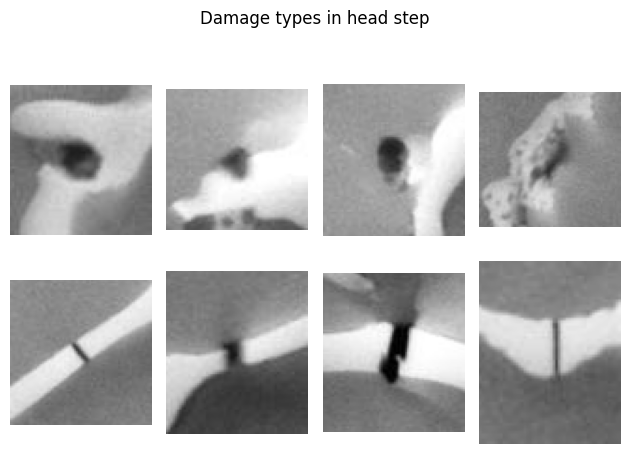

In [295]:
fig,ax=plt.subplots(2,4)
fig.suptitle('Damage types in head step')
p=sel_window(sample,img.shape)
for i in range(0,4):
    axi=ax[0,i]   
    sample=df_0.sample()
    img_p=sample.folder.values
    img=io.imread(img_p[0].parents[1].joinpath('crop').joinpath(f'{img_p[0].stem}.jpg'))
    print(p)
    p=sel_window(sample,img.shape)
    axi.imshow(img[p[2]:p[3],p[0]:p[1]],cmap='gray')
    axi.axis('off')
    axi.set_ylabel('Decohesion')
for i in range(0,4):
    axi=ax[1,i]
    sample=df_2.sample()
    img_p=sample.folder.values
    img=io.imread(img_p[0].parents[1].joinpath('crop').joinpath(f'{img_p[0].stem}.jpg'))
    p=sel_window(sample,img.shape)
       
    p=sel_window(sample,img.shape)
    axi.imshow(img[p[2]:p[3],p[0]:p[1]],cmap='gray')
    axi.axis('off')
    axi.set_ylabel('Decohesion')
fig.tight_layout()
    

(<matplotlib.image.AxesImage at 0x27d00c6b6d0>, [52, 72, 3733, 3999])

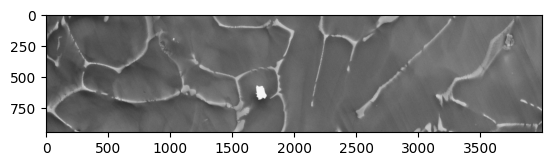

In [247]:
plt.imshow(img),p

In [229]:
sample

,index,type,x,y,s_x,s_y,acc,folder
32,39,2,0.122375,0.007625,0.01675,0.01525,0.873047,J:\Users\Berners_Lukas\LEO\yolov5\50_45\4mm_sa...


In [230]:
    p=sel_window(sample,img.shape)
    p

30
(4000, 4000, 3)


[-31, 91, 422, 556]

In [245]:
img.shape

(943, 4000, 3)

[1520, 1712, 3416, 3616]

3516
(4000, 2980, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

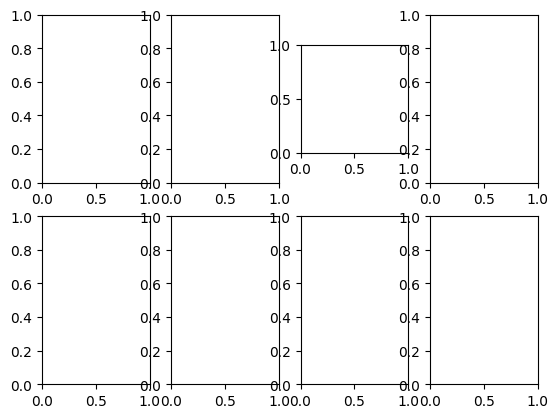

In [189]:
# plt.imshow(img)
p=sel_window(sample,img.shape)
fig,ax=plt.subplots(2,4)
axi=ax[0,i]   
axi.imshow(img[p[0]:p[1],p[2]:p[3]])
plt.show()

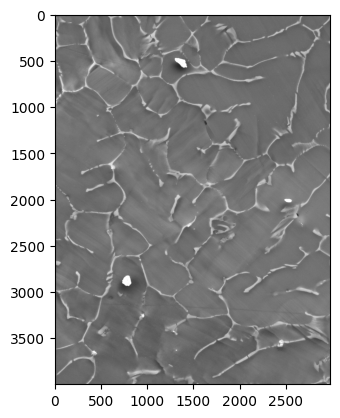

In [198]:
plt.imshow(img)

In [101]:
int(float(sample.s_y.values[0])*img.shape[1])


112

In [81]:
float(sample.x.values[0])

0.17175

In [77]:
sample

,index,type,x,y,s_x,s_y,acc,folder
0,0,0,0.17175,0.8645,0.0225,0.028,0.445557,J:\Users\Berners_Lukas\LEO\yolov5\50_45\4mm_sa...


In [56]:
(img_p[0].parent.joinpath(f'{img_p[0].stem}.jpg'))

WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r005_c004.jpg')

In [12]:
img_list=list(img_path.glob('*.jpg'))
img_list


[WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c000.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c001.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c002.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c003.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c004.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c005.jpg'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/3mm_yolo/damage_2023_07_19/output/50_45_3mm_yolo_eps5_leo_3stitched-0_r000_c006.jpg'),
 WindowsPath(